<a href="https://colab.research.google.com/github/A-ngelG/CE888/blob/main/lab2%20-%20bootstrap/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [81]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [82]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(df.head(5))
print(data.shape[0])

   Day   Millons of pounds in sales
0    1                          2.0
1    2                          8.0
2    3                         20.0
3    4                         13.0
4    5                          5.0
14


In [83]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	sample = np.random.choice(x,size = (n_bootstraps,sample_size) , replace = True)
	data_mean = np.mean(sample)
	mean_row = sample.mean(axis=1)	
	lower = np.percentile(mean_row,2.5)
	upper = np.percentile(mean_row,97.5)
	
	return data_mean, lower, upper


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

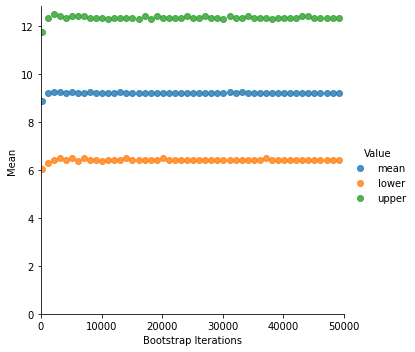

In [84]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])
df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)




Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [85]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	sample = np.random.choice(sample,size = (n_bootstraps,sample_size) , replace = True)
	data_mean = np.mean(sample)
	mean_row = sample.mean(axis=1)	
	np.sort(mean_row)
	lower = np.percentile(mean_row,(100-ci)/2)
	upper = np.percentile(mean_row,ci + (100- ci)/2)
	
	return data_mean, lower, upper

def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
	sample = np.random.choice(sample,size = (n_bootstraps,sample_size) , replace = True)
	data_std = np.std(sample)
	std_row = sample.std(axis=1)	
	np.sort(std_row)
	lower = np.percentile(std_row,(100-ci)/2)
	upper = np.percentile(std_row,ci + (100-ci)/2)
	
	return data_std, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

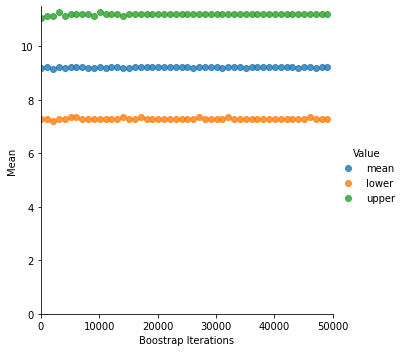

In [86]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")
sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


In [87]:
array = bootstrap_mean_ci(data,data.shape[0],10000,90)
low = array[1]
upp =  array[2]
print('lower 90', low)
print('upper 90 ',upp)
array = bootstrap_mean_ci(data,data.shape[0],10000,95)
low = array[1]
upp =  array[2]
print('lower 95', low)
print('upper 95 ',upp)
print(data.shape[0])

array = bootstrap_std_ci(data,data.shape[0],10000,90)
low = array[1]
upp =  array[2]
print('lower 90', low)
print('upper 90 ',upp)

array = bootstrap_std_ci(data,data.shape[0],10000,95)
low = array[1]
upp =  array[2]
print('lower 95', low)
print('upper 95 ',upp)

lower 90 6.857142857142857
upper 90  11.785714285714286
lower 95 6.428571428571429
upper 95  12.428571428571429
14
lower 90 3.014251771303804
upper 90  7.121485875303479
lower 95 2.718042512920064
upper 95  7.343294869796448


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [88]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data = df.values.T[1]
print(df.head(5))
df1 = df.dropna()
datac = df.values.T[0]
datan = df1.values.T[1]

# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


   Current fleet  New Fleet
0             18       24.0
1             15       27.0
2             18       27.0
3             16       25.0
4             17       31.0


## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [89]:
array = bootstrap_std_ci(datac,datac.shape[0],10000,95)###4
low = array[1]
upp =  array[2]
print('lower 95', low)
print('upper 95 ',upp)

array = bootstrap_std_ci(datan,datan.shape[0],10000,99)  ###5
low = array[1]
upp =  array[2]
print('lower 95', low)
print('upper 95 ',upp)



lower 95 5.813366625113529
upper 95  6.95214311044659
lower 95 4.876864463655599
upper 95  7.184374902270559


In [90]:

array = bootstrap_mean_ci(datan,datan.shape[0],10000,95) ####3
low = array[1]
upp =  array[2]
print('lower 95', low)
print('upper 95 ',upp)

lower 95 29.10126582278481
upper 95  31.79746835443038


In [91]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    count = 0
    for i in range(n_permutations):
        meandiffreal = np.mean(sample2) - np.mean(sample1) #new - current
        sample = np.concatenate((sample1,sample2))
        perm = np.random.permutation(sample)
        pc = np.mean(perm[:len(sample1)])
        pn = np.mean(perm[len(sample1):])
        meandiffperm = pn-pc #new-current
        #print('tperm ',meandiffperm)
        #print('tobs ',meandiffreal)
        if meandiffperm > meandiffreal: 
            count += 1     
    pvalue = count/n_permutations
    return pvalue

In [92]:
print('Pvalue = ', permut_test(datac,datan,30000))

Pvalue =  0.0


## Voting Data


In [93]:
# Load the data
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]
dfPA = pd.DataFrame({'dem_share_PA':dem_share_PA})
dataPA = dfPA.values.T[0]
dfOH = pd.DataFrame({'dem_share_OH':dem_share_OH})
dataOH = dfOH.values.T[0]
print(dfPA)
print(dfOH)

    dem_share_PA
0          60.08
1          40.64
2          36.07
3          41.21
4          31.04
..           ...
62         49.79
63         83.56
64         40.09
65         60.81
66         49.81

[67 rows x 1 columns]
    dem_share_OH
0          56.94
1          50.46
2          65.99
3          45.88
4          42.23
..           ...
83         53.53
84         36.54
85         49.58
86         41.97
87         38.11

[88 rows x 1 columns]


In [97]:
bootM_PA = bootstrap_mean_ci(dataPA,dataPA.shape[0],20000,95)
meanPA = bootM_PA[0]
lowPA = bootM_PA[1]
uppPA = bootM_PA[2]
print('Mean votes supporting democratic candidate in PA ', meanPA)
print('Condifence intervals (',lowPA,',',uppPA,')')
bootM_OH = bootstrap_mean_ci(dataOH,dataOH.shape[0],20000 ,95)
mean_OH = bootM_OH[0]
lowOH = bootM_OH[1]
uppOH = bootM_OH[2]
print('Mean votes supporting democratic candidate in OH ', mean_OH)
print('Condifence intervals (',lowOH,',',uppOH,')')

Mean votes supporting democratic candidate in PA  45.4675423507463
Condifence intervals ( 43.19625373134328 , 47.82914925373134 )
Mean votes supporting democratic candidate in OH  44.30554926136362
Condifence intervals ( 42.2335 , 46.34876704545454 )


In [96]:
print('Pvalue = ', permut_test(dataOH,dataPA,10000))

Pvalue =  0.2335
